In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
print(tf.__version__)
import matplotlib.pyplot as plt
import tensorboard
tensorboard.__version__
from datetime import datetime
from packaging import version

2.6.0


In [2]:
dft= pd.read_csv('Corécupjupy.csv', sep=';')
del dft[dft.columns[0]]
x, y = dft.values[:, :-1], dft.values[:, -1]

In [3]:
x=np.nan_to_num(x)
ytrain, yval, ytest=np.split((y), [int(0.8*len(y)), int(0.9*len(y))])
print(len(yval))
print(len(ytrain))
print(len(ytest))

59
475
60


In [4]:
dft=dft.fillna(value=0) 
dft =dft.drop(columns=['Result'])

In [5]:
train, val, test=np.split(dft.sample(frac=1), [int(0.8*len(dft)), int(0.9*len(dft))])

In [6]:
print(len(train))
print(len(val))
print(len(test))


475
59
60


In [7]:

normaliser = layers.Normalization()

In [8]:
normaliser.adapt(train)

In [14]:

model=tf.keras.Sequential(
    [
    normaliser,
    layers.Dense(10, input_shape=(3, 5, 0)),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1),
])

print(model.layers[4].weights)

[<tf.Variable 'dense_7/kernel:0' shape=(10, 1) dtype=float32, numpy=
array([[ 0.51605195],
       [ 0.26185805],
       [ 0.5005701 ],
       [ 0.44822246],
       [-0.7065485 ],
       [ 0.08901262],
       [-0.43553498],
       [ 0.21482909],
       [ 0.6101909 ],
       [ 0.51808995]], dtype=float32)>, <tf.Variable 'dense_7/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [16]:
history=model.fit(train, ytrain,  epochs=50,
                  validation_data=(val,yval), batch_size=2)

Epoch 1/50
238/238 [==============================] - 1s 2ms/step - loss: 0.7109 - accuracy: 0.4800 - val_loss: 0.8346 - val_accuracy: 0.9492
Epoch 2/50
238/238 [==============================] - 0s 865us/step - loss: 0.6910 - accuracy: 0.4695 - val_loss: 0.8575 - val_accuracy: 1.0000
Epoch 3/50
238/238 [==============================] - 0s 848us/step - loss: 0.6894 - accuracy: 0.4547 - val_loss: 0.7796 - val_accuracy: 1.0000
Epoch 4/50
238/238 [==============================] - 0s 848us/step - loss: 0.6894 - accuracy: 0.4589 - val_loss: 0.7841 - val_accuracy: 1.0000
Epoch 5/50
238/238 [==============================] - 0s 869us/step - loss: 0.6874 - accuracy: 0.4611 - val_loss: 0.7946 - val_accuracy: 1.0000
Epoch 6/50
238/238 [==============================] - 0s 874us/step - loss: 0.6870 - accuracy: 0.4695 - val_loss: 0.8117 - val_accuracy: 0.9831
Epoch 7/50
238/238 [==============================] - 0s 849us/step - loss: 0.6871 - accuracy: 0.4821 - val_loss: 0.8374 - val_accuracy: 0

In [17]:
loss, accuracy = model.evaluate(test, ytest)
print("Accuracy", accuracy)

2/2 [==============================] - 0s 2ms/step - loss: 1.0719 - accuracy: 0.5833
Accuracy 0.5833333134651184


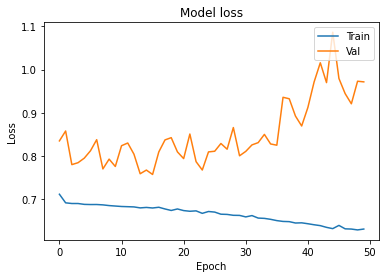

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

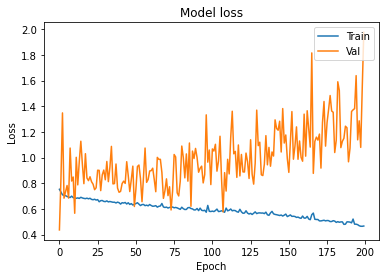